C:\Users\Divyansh\installed\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Divyansh\installed\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sqrt


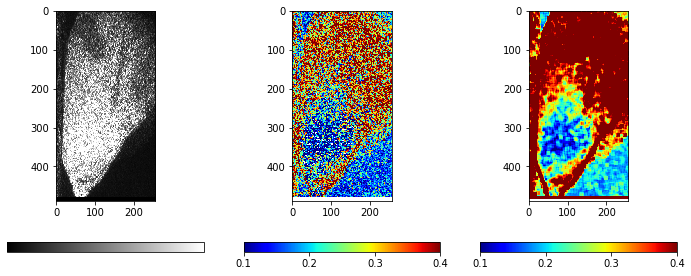

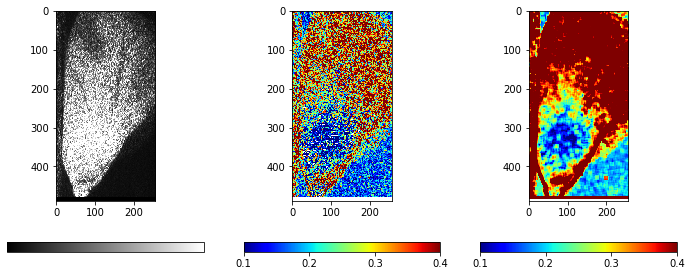

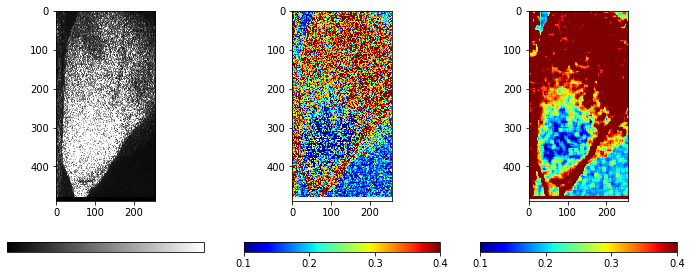

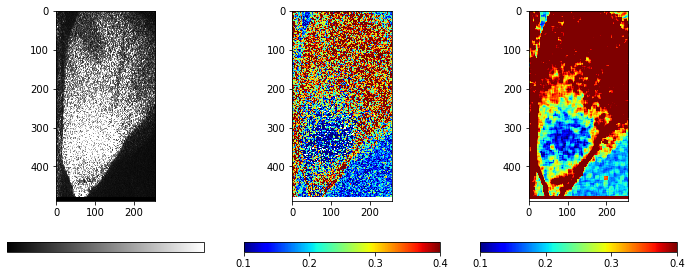

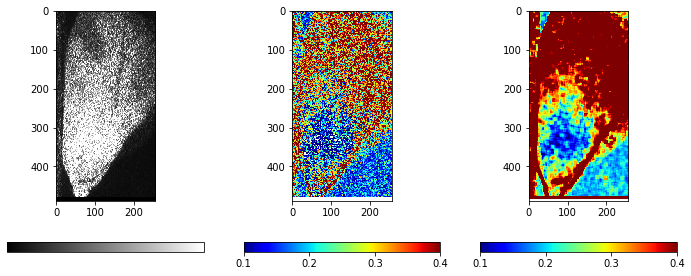

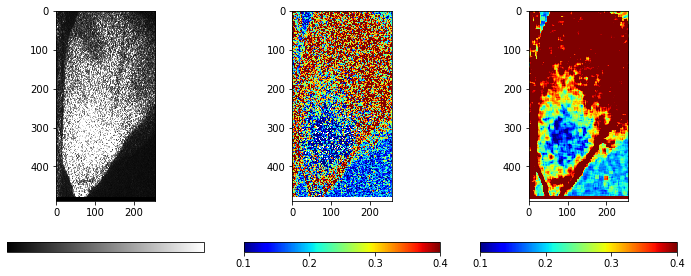

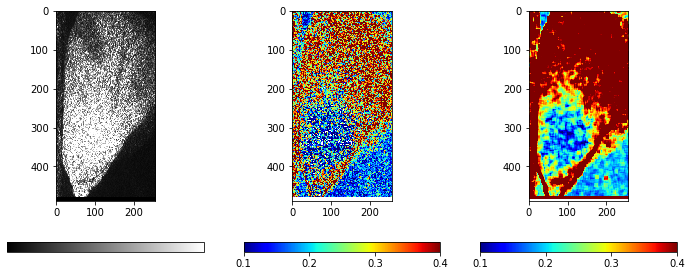

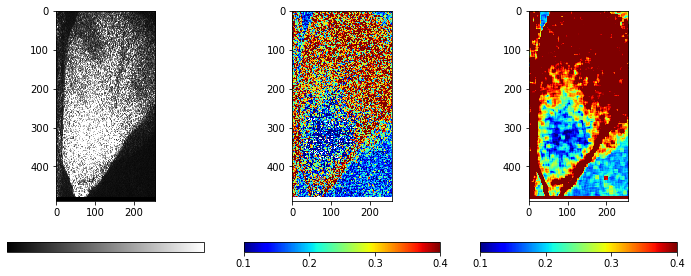

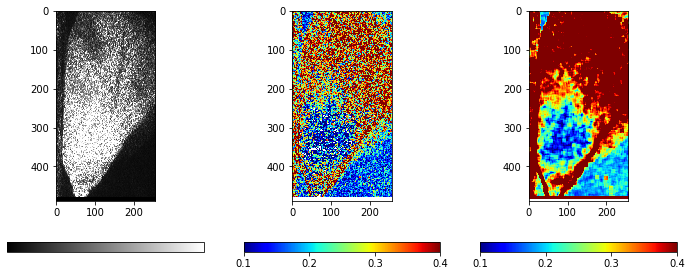

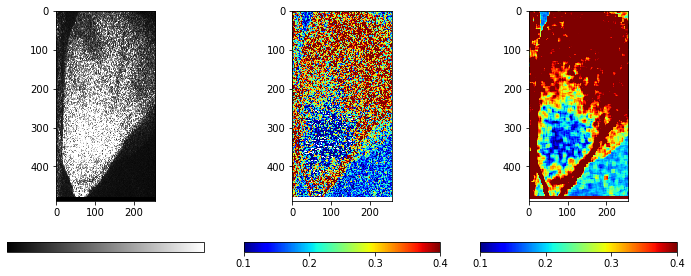

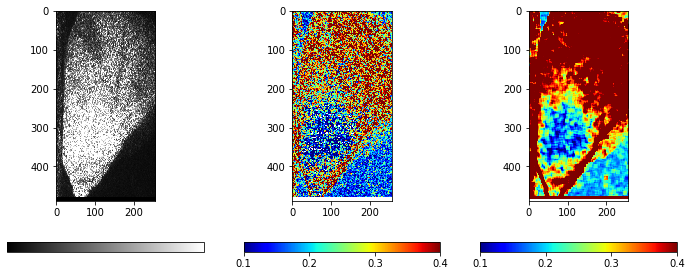

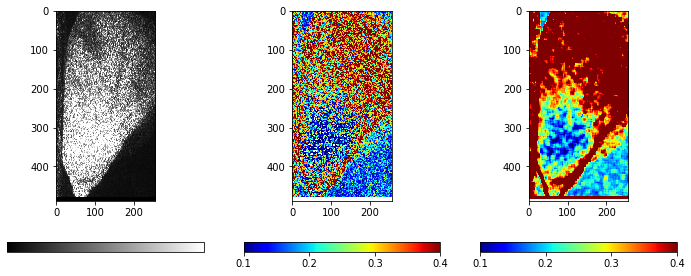

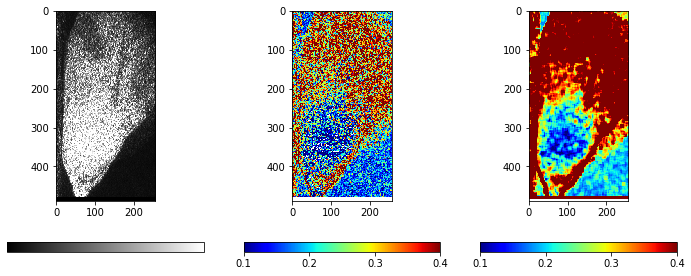

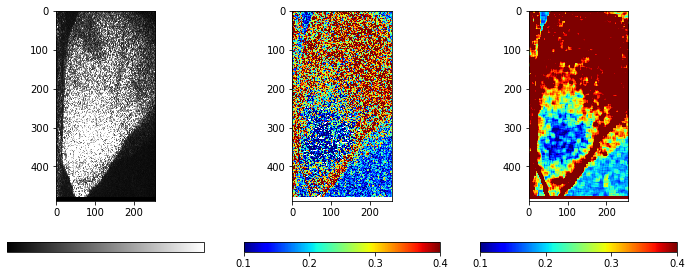

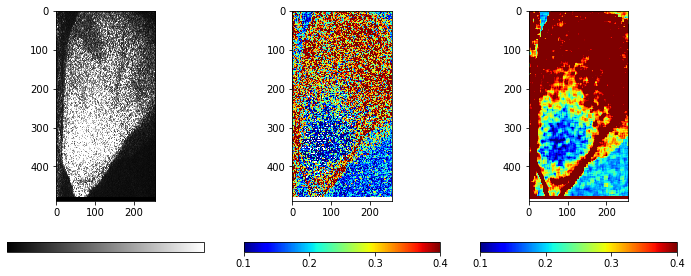

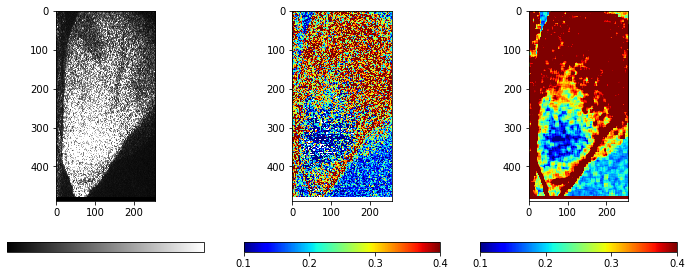

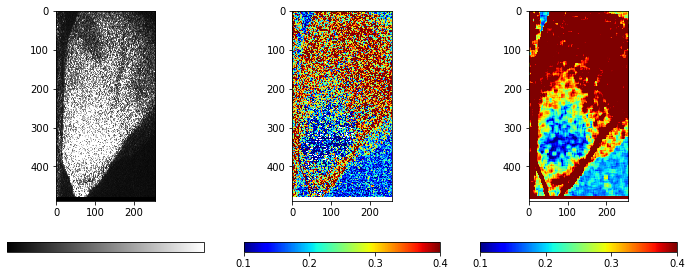

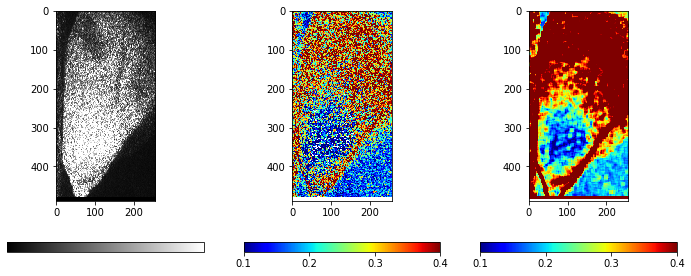

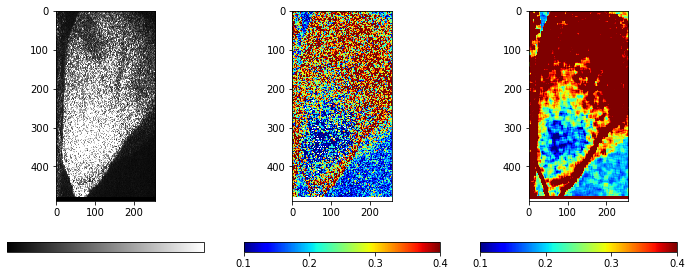

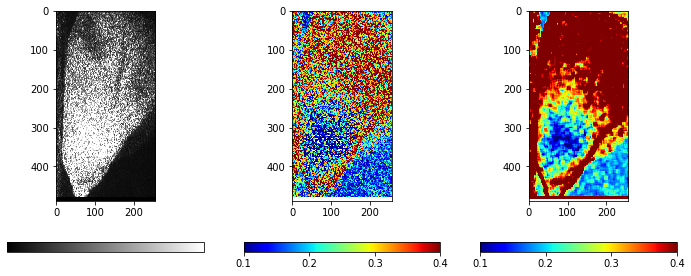

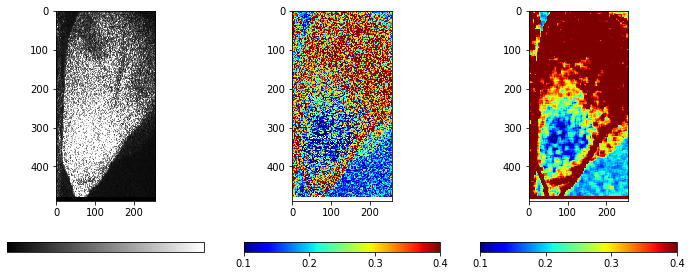

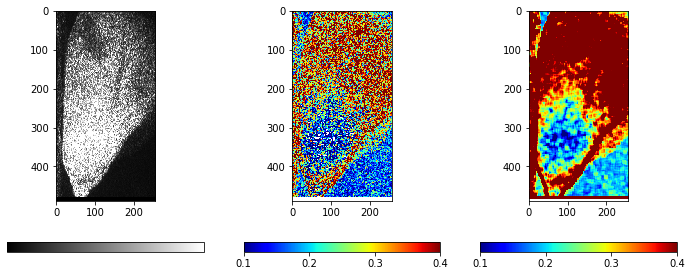

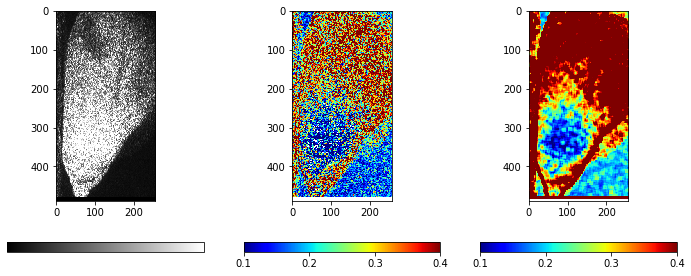

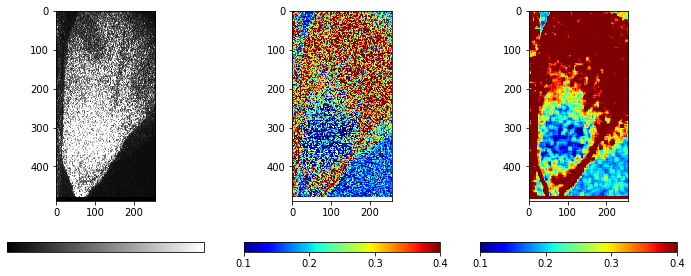

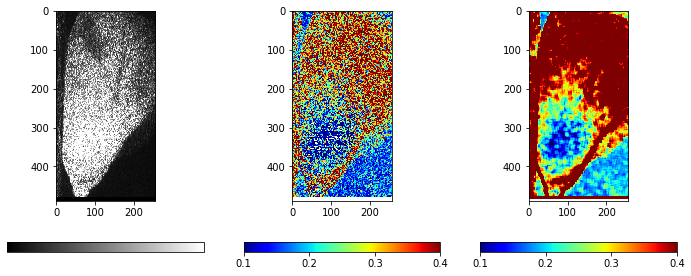

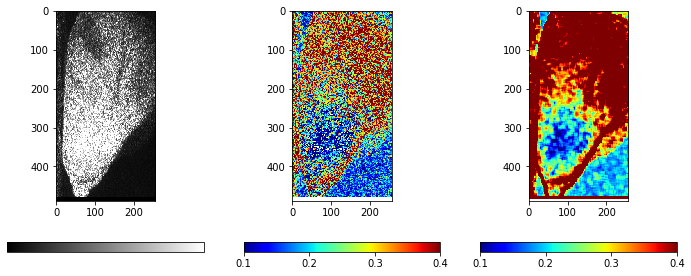

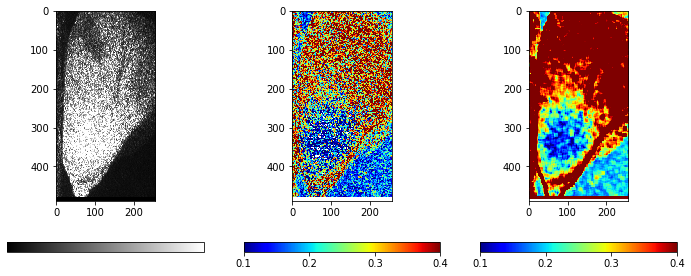

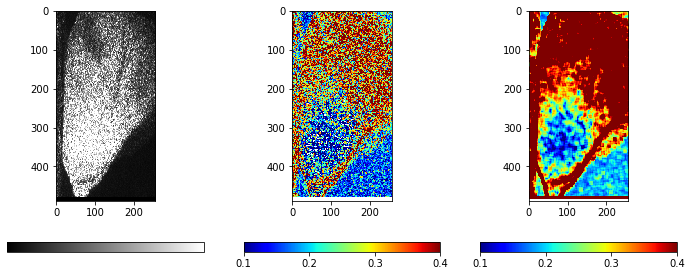

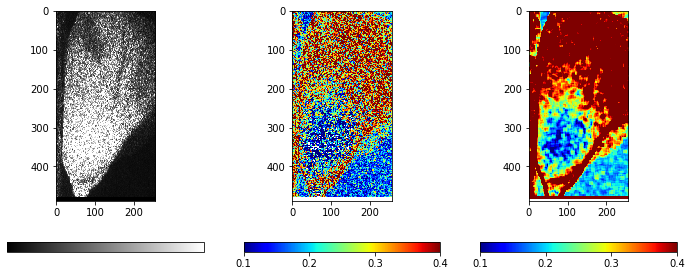

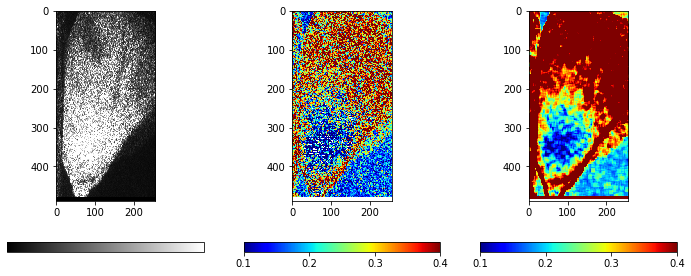

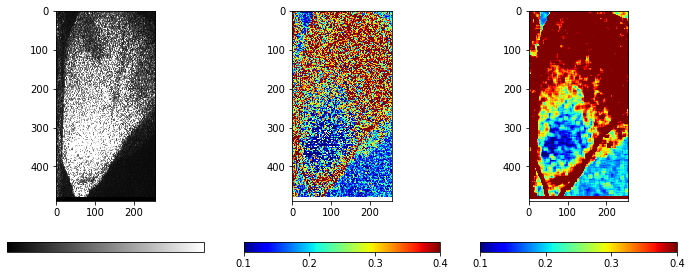

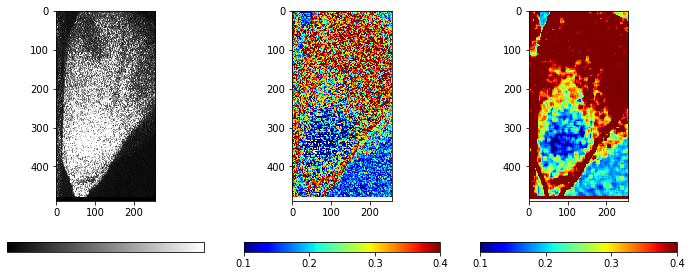

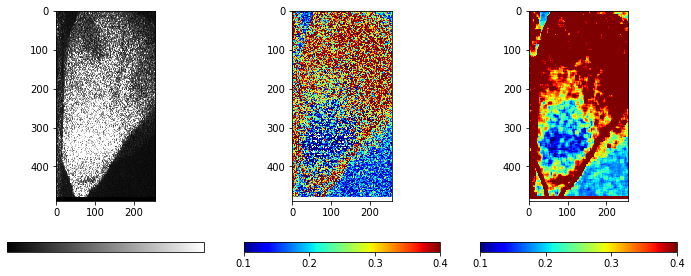

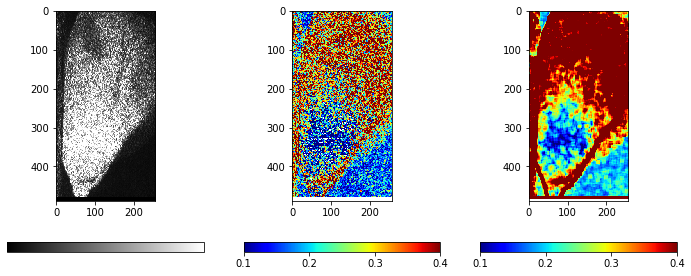

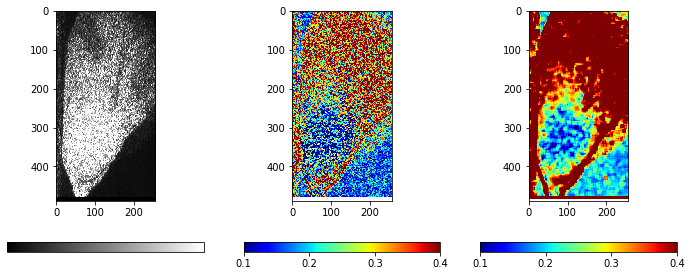

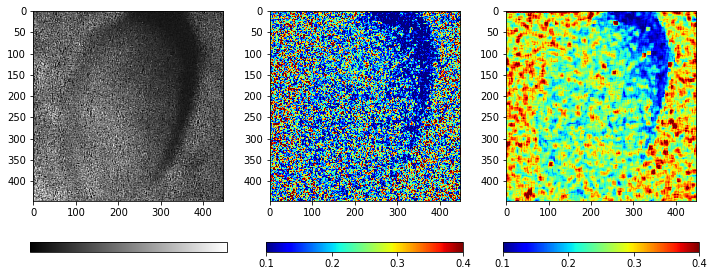

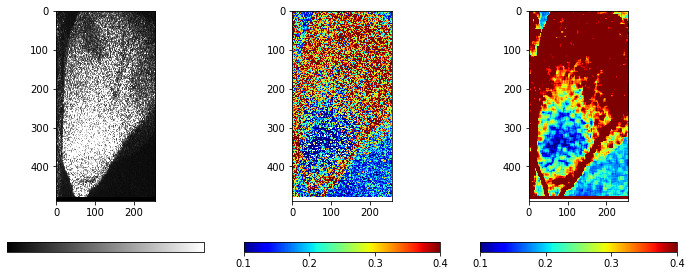

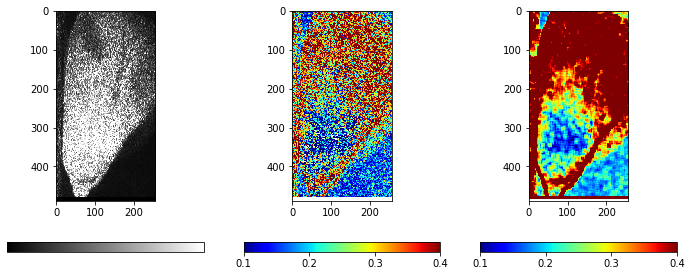

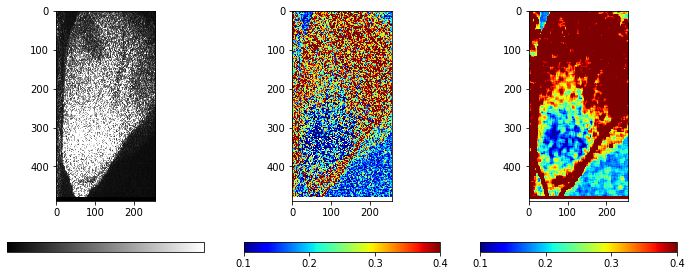

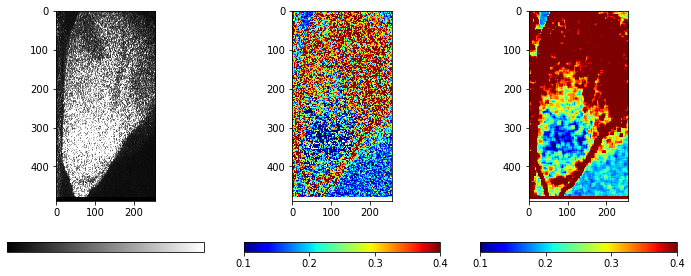

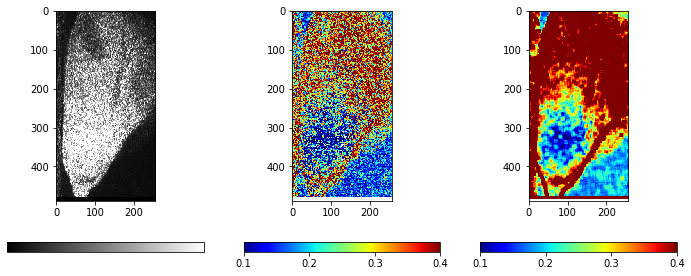

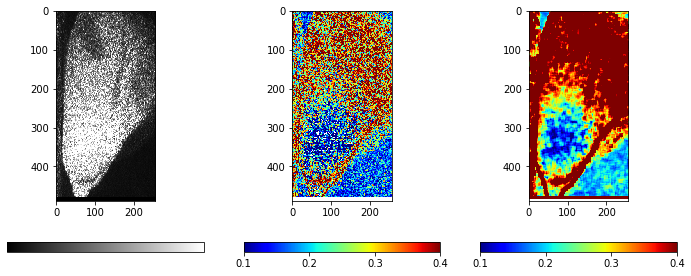

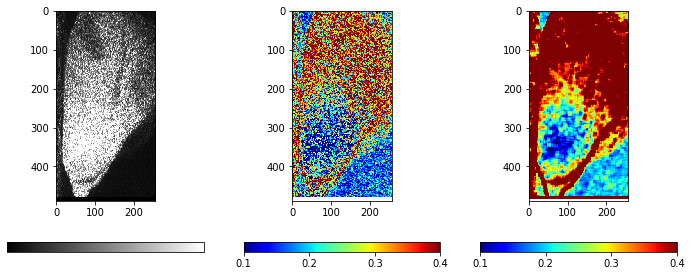

KeyboardInterrupt: 

In [2]:

#############
import os
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage
from PIL import Image

#function for lasca contrast calculation
def lasca(imarray, wsize = 10):
    immean = ndimage.uniform_filter(imarray, size=wsize)	
    im2mean = ndimage.uniform_filter(np.square(imarray), size=wsize)
    imcontrast = np.sqrt(im2mean / np.square(immean) - 1)
    return imcontrast


#DIRECTORY=r'C:\Users\Divyansh\Desktop'
DIRECTORY=r'C:\Users\Divyansh\Desktop\yest_img\New folder'
CATEGORIES=['MaizeSeed']

    
for category in CATEGORIES:
    folder=os.path.join(DIRECTORY,category)
    for img in os.listdir(folder):
        
        img_path =os.path.join(folder,img)    
#load test dataset
        im = Image.open(img_path)
#taking only 1st frame
        im.seek(0)
#convert to the float for filtering and calculation
        imarray = np.array(im).astype(float)

#make contrast with windo of 5 pixels
        imcontrast05 = lasca(imarray, 3)
#make contrast with windo of 10 pixels
        imcontrast10 = lasca(imarray, 10)

#finally plot the data and results
        plt.figure(figsize=(12,5))
        plt.subplot(1,3,1);
        plt.imshow(imarray,  cmap=plt.get_cmap("gray"))
        plt.colorbar(orientation = 'horizontal',  ticks = np.linspace(500, 2000, 4, endpoint=True))

        plt.subplot(1,3,2);
        plt.imshow(imcontrast05,  vmin=0.1, vmax=0.4, cmap=plt.get_cmap("jet"))
        plt.colorbar(orientation = 'horizontal', ticks = [0.1, 0.2, 0.3, 0.4])

        plt.subplot(1,3,3);
        plt.imshow(imcontrast10,  vmin=0.1, vmax=0.4, cmap=plt.get_cmap("jet"))
        plt.colorbar(orientation = 'horizontal', ticks = [0.1, 0.2, 0.3, 0.4])

#saves figure
#plt.savefig('result.jpg', bbox_inches=0, pad_inches=0,dpi=120);
        plt.show()
        


